In [1]:
# imports and customization
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
# Kaggle data.
# Downloaded from https://www.kaggle.com/datasets/pablomonleon/montreal-bike-lanes
# License- Database: Open Database (per site licensing)
filename = 'data/comptagesvelo2015.csv'

# Preview the data
f = open(filename, 'r')
f.readlines()[:5] # first five rows of raw data

['Date,,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,Parc U-Zelt Test,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger\n',
 '01/01/2015,00:00,58,12,4,17,33,49,21,16,16,,7,,58,91,24,3,,17,78,21,6\n',
 '02/01/2015,00:00,75,7,5,15,30,113,27,9,32,,11,,109,177,32,13,,11,57,77,4\n',
 '03/01/2015,00:00,79,7,3,7,30,107,36,12,18,,2,,71,131,33,5,,14,174,40,5\n',
 '04/01/2015,00:00,10,1,21,0,10,35,29,1,0,,0,,6,11,6,1,,1,20,6,0\n']

The dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2015.

In [137]:
# Loading to dataframe
df = pd.read_csv(
    filename,
    index_col=0, # first column shall be handled as an index
    parse_dates=True # index values are of type datetime
)
df.shape

(319, 22)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 319 entries, 2015-01-01 to 2015-11-15
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 1                   319 non-null    object 
 1   Berri1                       319 non-null    int64  
 2   Boyer                        319 non-null    int64  
 3   Brébeuf                      319 non-null    int64  
 4   CSC (Côte Sainte-Catherine)  319 non-null    int64  
 5   Maisonneuve_1                62 non-null     float64
 6   Maisonneuve_2                319 non-null    int64  
 7   Maisonneuve_3                319 non-null    int64  
 8   Notre-Dame                   319 non-null    int64  
 9   Parc                         319 non-null    int64  
 10  Parc U-Zelt Test             52 non-null     float64
 11  PierDup                      319 non-null    int64  
 12  Pont_Jacques_Cartier         209 non-null    float64
 13  R

In [139]:
df.head()

,Unnamed: 1,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,00:00,58,12,4,17,33.0,49,21,16,16,...,NaN,58,91,24,3,NaN,17,78,21,6
2015-02-01,00:00,75,7,5,15,30.0,113,27,9,32,...,NaN,109,177,32,13,NaN,11,57,77,4
2015-03-01,00:00,79,7,3,7,30.0,107,36,12,18,...,NaN,71,131,33,5,NaN,14,174,40,5
2015-04-01,00:00,10,1,21,0,10.0,35,29,1,0,...,NaN,6,11,6,1,NaN,1,20,6,0
2015-05-01,00:00,42,0,2,0,27.0,90,21,1,1,...,NaN,0,5,49,20,NaN,0,41,56,10


In [50]:
# Let's investigate what values are present in the Unnamed: 1 column
df[['Unnamed: 1']].value_counts()

Unnamed: 1
00:00         319
dtype: int64

In [51]:
# Drop the column not of interest by specifying the column name and index
df = df.drop('Unnamed: 1', 1)

/tmp/ipykernel_117/55181304.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 1', 1)


In [52]:
df.describe().round(2)

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_1,Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,Parc U-Zelt Test,...,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Laurent U-Zelt Test,Saint-Urbain,Totem_Laurier,University,Viger
count,319.00,319.00,319.00,319.00,62.00,319.00,319.00,319.00,319.00,52.00,...,209.00,319.00,319.00,319.00,319.00,50.00,319.00,319.00,319.00,319.00
mean,2915.40,2212.91,2859.49,1167.39,89.94,2208.03,1011.18,1137.32,1754.26,2090.25,...,2164.58,2207.63,2939.29,1477.21,207.48,4563.18,1387.12,1903.36,2023.71,295.35
std,2276.28,1832.81,2337.53,960.02,51.89,2452.48,917.45,991.07,1415.00,972.74,...,1049.22,1660.94,2105.77,1254.99,231.01,1667.55,1070.78,1376.38,1632.37,248.95
min,10.00,0.00,0.00,0.00,10.00,2.00,8.00,0.00,0.00,0.00,...,0.00,0.00,5.00,0.00,0.00,1554.00,0.00,20.00,6.00,0.00
25%,387.50,3.50,33.00,54.50,46.50,214.50,119.00,25.50,61.00,1275.00,...,1221.00,324.50,513.00,159.50,15.50,3097.25,244.50,457.00,352.50,47.00
50%,3044.00,2180.00,3011.00,1162.00,85.00,689.00,1049.00,1067.00,1787.00,2258.00,...,2349.00,2361.00,3169.00,1422.00,107.00,4825.50,1519.00,1855.00,1762.00,267.00
75%,4968.00,3937.00,5088.00,1948.00,131.50,4114.50,1675.00,2094.50,3025.50,2775.50,...,2966.00,3658.00,4797.00,2676.00,337.00,5957.75,2237.00,3111.00,3539.00,526.00
max,7387.00,6153.00,7322.00,3334.00,207.00,7905.00,9999.00,3035.00,4867.00,3997.00,...,6014.00,7921.00,7695.00,4118.00,781.00,7388.00,4342.00,5166.00,5596.00,820.00


In [53]:
# The info() and describe() shows not all rows have values in Maisonneuve_1, Parc U-Zelt Test, Saint-Laurent U-Zelt Test
# So droping the columns with na
df.dropna(axis='columns', inplace=True) 

In [54]:
df.describe().round(2)

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
count,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00,319.00
mean,2915.40,2212.91,2859.49,1167.39,2208.03,1011.18,1137.32,1754.26,1130.71,2207.63,2939.29,1477.21,207.48,1387.12,1903.36,2023.71,295.35
std,2276.28,1832.81,2337.53,960.02,2452.48,917.45,991.07,1415.00,1207.66,1660.94,2105.77,1254.99,231.01,1070.78,1376.38,1632.37,248.95
min,10.00,0.00,0.00,0.00,2.00,8.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,20.00,6.00,0.00
25%,387.50,3.50,33.00,54.50,214.50,119.00,25.50,61.00,3.00,324.50,513.00,159.50,15.50,244.50,457.00,352.50,47.00
50%,3044.00,2180.00,3011.00,1162.00,689.00,1049.00,1067.00,1787.00,685.00,2361.00,3169.00,1422.00,107.00,1519.00,1855.00,1762.00,267.00
75%,4968.00,3937.00,5088.00,1948.00,4114.50,1675.00,2094.50,3025.50,2168.00,3658.00,4797.00,2676.00,337.00,2237.00,3111.00,3539.00,526.00
max,7387.00,6153.00,7322.00,3334.00,7905.00,9999.00,3035.00,4867.00,4787.00,7921.00,7695.00,4118.00,781.00,4342.00,5166.00,5596.00,820.00


<AxesSubplot:>

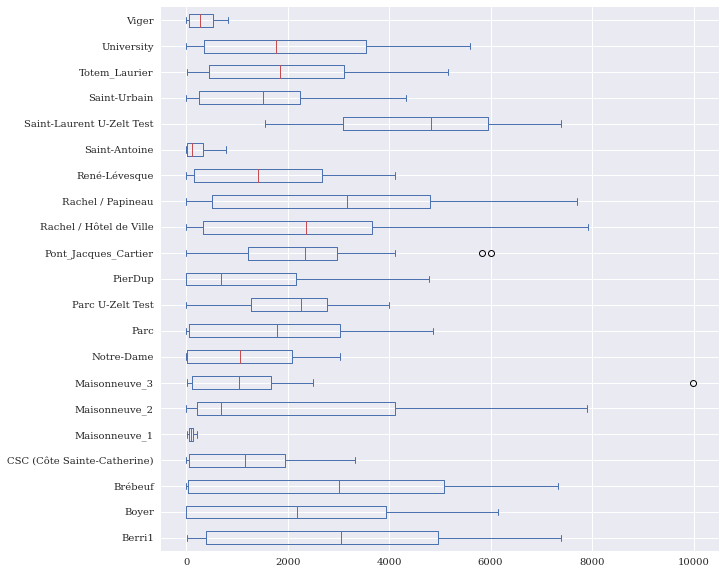

In [138]:
df.plot(kind="box", vert=False, figsize=(10,10))

In [62]:
df.shape

(319, 17)

In [64]:
df.drop('Maisonneuve_3', axis=1, inplace=True)

In [65]:
df.shape

(319, 16)

In [136]:
df.head()

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Notre-Dame,Parc,PierDup,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Date,,,,,,,,,,,,,,,,
2015-01-01,58,12,4,17,49,16,16,7,58,91,24,3,17,78,21,6
2015-02-01,75,7,5,15,113,9,32,11,109,177,32,13,11,57,77,4
2015-03-01,79,7,3,7,107,12,18,2,71,131,33,5,14,174,40,5
2015-04-01,10,1,21,0,35,1,0,0,6,11,6,1,1,20,6,0
2015-05-01,42,0,2,0,90,1,1,6,0,5,49,20,0,41,56,10
